# Multiclass Classification

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Create a multiclass dataset

In [1]:
from sklearn.datasets import make_classification
n = 4
X, Y = make_classification(n_samples=8000, n_features=30, n_informative=15, n_classes=n, random_state=42 )

In [2]:
X[0:3]

array([[ 1.18989763,  1.07519621,  1.9712155 , -2.78502226,  0.15851885,
         0.10576963, -1.92585519, -0.98914574,  0.89771514,  2.61154639,
         0.40356706, -2.38658943, -1.41711657,  2.69842988,  4.51088613,
        -1.03084425, -2.23409045,  0.05608878, -0.70583655,  0.54856488,
        -0.1350877 ,  0.63001972, -2.4405616 , -3.72083607,  0.51809059,
        -0.88265064,  0.97481641, -1.47025468,  0.06397232, -0.51422152],
       [ 0.65042513,  0.48024195,  2.24436989,  0.91582403,  4.32433842,
         0.80864579, -1.51338839,  0.73204491, -0.48853024, -1.11047179,
        -0.57394658, -0.06773579,  1.60386036,  2.25873392, -4.60009364,
        -0.33822724,  0.1552555 ,  1.15004811,  0.3677702 , -1.34213584,
        -0.42012914,  2.69022457,  5.81684911, -1.53294049,  0.87006735,
        -1.72364277, -1.06324656, -0.71016267,  1.24918837, -0.44310873],
       [ 0.01300429,  0.19766843,  4.28019934, -1.69922259,  1.95333671,
         1.80821602, -0.83458112, -0.28264228,  0

In [3]:
Y[0:5]

array([3, 3, 2, 2, 3])

In [4]:
import numpy as np 
np.unique(Y)

array([0, 1, 2, 3])

### Convert X and Y in Dataframe format

In [5]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [6]:
import pandas as pd 
X = pd.DataFrame(X, columns=cols)
Y = pd.DataFrame(Y, columns=['target'])

In [7]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,1.189898,1.075196,1.971215,-2.785022,0.158519,0.105770,-1.925855,-0.989146,0.897715,2.611546,...,-0.135088,0.630020,-2.440562,-3.720836,0.518091,-0.882651,0.974816,-1.470255,0.063972,-0.514222
1,0.650425,0.480242,2.244370,0.915824,4.324338,0.808646,-1.513388,0.732045,-0.488530,-1.110472,...,-0.420129,2.690225,5.816849,-1.532940,0.870067,-1.723643,-1.063247,-0.710163,1.249188,-0.443109
2,0.013004,0.197668,4.280199,-1.699223,1.953337,1.808216,-0.834581,-0.282642,0.872221,-2.560721,...,-2.992438,1.051425,-3.244722,-4.590355,0.508829,0.356703,-1.944930,2.148793,0.034755,0.671832
3,0.705489,0.483920,-2.386701,-0.849569,6.364909,-0.350167,3.330057,-3.012621,0.256254,3.597020,...,0.208671,1.268165,9.008501,-2.749453,-0.218515,-1.131341,2.279746,1.053980,0.138332,-1.129947
4,-0.714800,0.850380,-1.570028,0.146249,-1.199749,1.231657,-0.571366,0.251685,-0.285070,-0.222989,...,-1.497961,-0.812994,1.685803,-1.056207,-1.269361,0.154063,-1.472332,-2.031469,-0.285093,-0.797438


In [8]:
Y.head()

,target
0,3
1,3
2,2
3,2
4,3


In [9]:
Y.value_counts()

target
1         2004
3         2003
2         2000
0         1993
Name: count, dtype: int64

### Perform Preprocessing on X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [13]:
X_pre= num_pipe.fit_transform(X)
X_pre

array([[ 1.17259637e+00,  1.07043883e+00,  6.05723729e-01, ...,
        -4.24894019e-01,  6.54500620e-02, -5.05668952e-01],
       [ 6.35220093e-01,  4.71223541e-01,  7.17452971e-01, ...,
        -9.31363612e-02,  1.25606770e+00, -4.34953707e-01],
       [ 2.76093043e-04,  1.86626243e-01,  1.55017500e+00, ...,
         1.15471308e+00,  3.60991332e-02,  6.73753630e-01],
       ...,
       [ 1.06866046e-01,  1.20771035e+00, -7.12005672e-01, ...,
        -1.73309368e-01, -2.24978142e-01, -1.55045081e+00],
       [-5.61898576e-01,  5.08700675e-02, -2.54143563e-01, ...,
         9.85066554e-03, -5.10522234e-01, -1.96819816e-01],
       [ 8.33781180e-02, -1.43270878e+00,  7.28596764e-01, ...,
        -1.55972516e+00,  1.42878534e+00,  3.30063674e-01]])

In [14]:
cols = num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,1.172596,1.070439,0.605724,-1.094554,0.067820,0.111409,-0.717072,-0.979947,0.892751,1.120256,...,-0.154308,0.653861,-0.365895,-1.411870,0.542396,-0.900517,0.296431,-0.424894,0.065450,-0.505669
1,0.635220,0.471224,0.717453,0.377608,1.752305,0.816611,-0.542636,0.733959,-0.490358,-0.487974,...,-0.438290,2.711767,1.023110,-0.575380,0.896711,-1.746515,-0.573670,-0.093136,1.256068,-0.434954
2,0.000276,0.186626,1.550175,-0.662633,0.793570,1.819488,-0.255563,-0.276433,0.867315,-1.114606,...,-3.001041,1.074796,-0.501165,-1.744310,0.533072,0.346213,-0.950083,1.154713,0.036099,0.673754
3,0.690070,0.474928,-1.176809,-0.324649,2.577428,-0.346036,1.505700,-2.994857,0.252742,1.546065,...,0.188174,1.291294,1.559987,-1.040485,-0.199104,-1.150688,0.853538,0.676860,0.140149,-1.117952
4,-0.724700,0.844013,-0.842763,0.071479,-0.481407,1.241022,-0.144247,0.255632,-0.287358,-0.104506,...,-1.512118,-0.787543,0.328214,-0.393113,-1.256931,0.142367,-0.748319,-0.669848,-0.285206,-0.787302


### Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2,random_state=42)

In [17]:
xtrain.shape

(6400, 30)

In [18]:
xtest.shape

(1600, 30)

In [19]:
ytrain.value_counts()

target
3         1625
0         1612
1         1587
2         1576
Name: count, dtype: int64

In [20]:
ytest.value_counts()

target
2         424
1         417
0         381
3         378
Name: count, dtype: int64

### Onehot encode Y features

In [21]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [22]:
ytrain_cat[0:5]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
ytrain.head()

,target
1467,3
5768,2
5714,0
1578,3
6958,3


In [24]:
ytest_cat[0:5]

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [25]:
ytest.head()

,target
2215,3
2582,1
1662,1
3027,1
4343,0


### Create a neural network

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping 

In [27]:
xtrain.shape[1]

30

In [28]:
ytrain_cat.shape

(6400, 4)

In [29]:
model = Sequential()

# Hidden Layer 1 
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
model.add(Dropout(0.3))

# Hidden Layer 2 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(4, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4196 (16.39 KB)
Trainable params: 4196 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Early Stopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [34]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200, callbacks=[early_stop])

Epoch 1/200


160/160 [==============================] - 5s 9ms/step - loss: 1.3043 - accuracy: 0.3900 - val_loss: 1.0787 - val_accuracy: 0.5586
Epoch 2/200
160/160 [==============================] - 1s 6ms/step - loss: 1.0256 - accuracy: 0.5561 - val_loss: 0.9022 - val_accuracy: 0.6422
Epoch 3/200
160/160 [==============================] - 1s 6ms/step - loss: 0.8967 - accuracy: 0.6266 - val_loss: 0.8300 - val_accuracy: 0.6578
Epoch 4/200
160/160 [==============================] - 1s 6ms/step - loss: 0.8171 - accuracy: 0.6574 - val_loss: 0.7703 - val_accuracy: 0.6883
Epoch 5/200
160/160 [==============================] - 1s 6ms/step - loss: 0.7775 - accuracy: 0.6824 - val_loss: 0.7217 - val_accuracy: 0.7195
Epoch 6/200
160/160 [==============================] - 1s 6ms/step - loss: 0.7221 - accuracy: 0.7092 - val_loss: 0.6820 - val_accuracy: 0.7297
Epoch 7/200
160/160 [==============================] - 1s 6ms/step - loss: 0.6845 - accuracy: 0.7324 - val_loss: 0.6359 - val_accuracy: 0.76

### Observe the learning curve

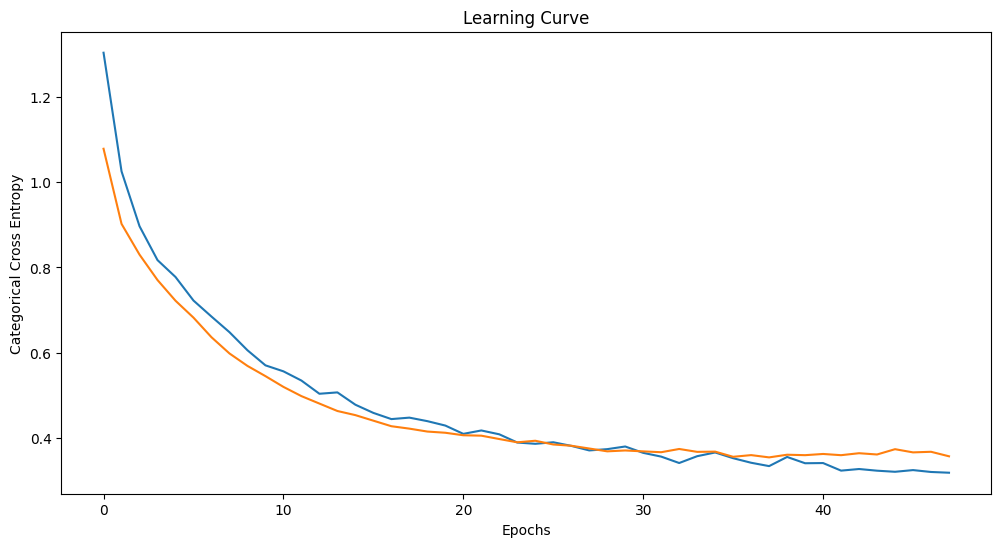

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.show()

### Evaluate the model

In [36]:
model.evaluate(xtrain, ytrain_cat)

200/200 [==============================] - 1s 4ms/step - loss: 0.2024 - accuracy: 0.9455


[0.20244155824184418, 0.9454687237739563]

In [38]:
model.evaluate(xtest, ytest_cat)

50/50 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8944


[0.333748459815979, 0.8943750262260437]

### Predict values for train and test

In [39]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

50/50 [==============================] - 0s 8ms/step


In [40]:
yprob_ts[0:5]

array([[8.8435452e-05, 8.6814725e-05, 6.9036579e-04, 9.9913436e-01],
       [9.3462935e-05, 9.9642521e-01, 3.4811720e-03, 6.2587539e-08],
       [6.0525415e-03, 9.9255145e-01, 2.7899057e-04, 1.1170431e-03],
       [1.4665894e-01, 7.2300869e-01, 1.3221990e-05, 1.3031918e-01],
       [8.6896074e-01, 1.3001207e-01, 4.0533489e-08, 1.0272028e-03]],
      dtype=float32)

In [41]:
yprob_tr[0:5]

array([[9.7956583e-02, 3.4616289e-03, 1.5731304e-05, 8.9856613e-01],
       [1.8683251e-06, 2.0424974e-05, 9.9995756e-01, 2.0088648e-05],
       [9.8375708e-01, 6.7435019e-03, 3.3150957e-04, 9.1678174e-03],
       [1.8137425e-02, 7.2075672e-02, 5.5935501e-10, 9.0978688e-01],
       [4.2171743e-02, 1.2684349e-02, 4.2032439e-04, 9.4472361e-01]],
      dtype=float32)

### Convert probabilities to predictions

In [42]:
ypred_tr = np.argmax(yprob_tr, axis=-1)
ypred_tr

array([3, 2, 0, ..., 2, 0, 3], dtype=int64)

In [43]:
ypred_ts = np.argmax(yprob_ts, axis=-1)

### Create a confusion matrix for Test

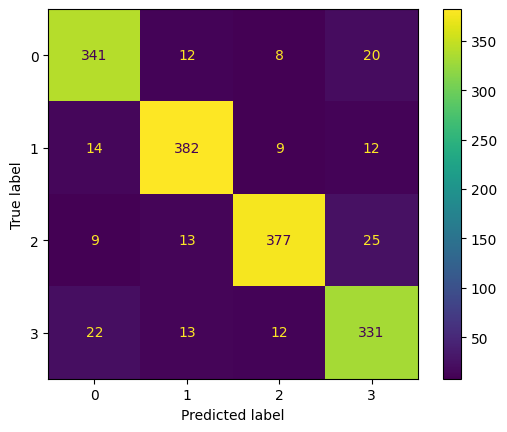

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print Classification Report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       381
           1       0.91      0.92      0.91       417
           2       0.93      0.89      0.91       424
           3       0.85      0.88      0.86       378

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.90      0.89      0.89      1600



### Save the model for future use

In [47]:
model.save('Multiclassification.keras')

### Loading The model

In [48]:
from keras.models import load_model
nn = load_model('Multiclassification.keras')

In [49]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4196 (16.39 KB)
Trainable params: 4196 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
